# Identifying Logo

### Importing the Keras libraries and packages

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


### Initialising the CNN

In [47]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### Fitting the CNN to the images

In [48]:
from keras.preprocessing.image import ImageDataGenerator

In [49]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [50]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [51]:
training_set = train_datagen.flow_from_directory('/Users/praga/Downloads/logo_train',
                                                 target_size = (64, 64),
                                                 batch_size = 10,
                                                 class_mode = 'binary')

Found 189 images belonging to 2 classes.


In [52]:
test_set = test_datagen.flow_from_directory('/Users/praga/Downloads/logo_test',
                                            target_size = (64, 64),
                                            batch_size = 10,
                                            class_mode = 'binary')

Found 13 images belonging to 2 classes.


In [53]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 500)

Epoch 1/10
40/40 [==============================] - 11s 272ms/step - loss: 0.6871 - acc: 0.5622 - val_loss: 0.4942 - val_acc: 0.6923
Epoch 2/10
40/40 [==============================] - 10s 253ms/step - loss: 0.3997 - acc: 0.8461 - val_loss: 0.2782 - val_acc: 0.8462
Epoch 3/10
40/40 [==============================] - 10s 256ms/step - loss: 0.2954 - acc: 0.8889 - val_loss: 0.1562 - val_acc: 0.9231
Epoch 4/10
40/40 [==============================] - 11s 268ms/step - loss: 0.2069 - acc: 0.9297 - val_loss: 0.1528 - val_acc: 0.9231
Epoch 5/10
40/40 [==============================] - 11s 276ms/step - loss: 0.2018 - acc: 0.9275 - val_loss: 0.1339 - val_acc: 0.9231
Epoch 6/10
40/40 [==============================] - 12s 305ms/step - loss: 0.1492 - acc: 0.9445 - val_loss: 0.2073 - val_acc: 0.8462
Epoch 7/10
40/40 [==============================] - 12s 299ms/step - loss: 0.1340 - acc: 0.9525 - val_loss: 0.1371 - val_acc: 0.9231
Epoch 8/10
40/40 [==============================] - 12s 299ms/step - 

### Making new predictions

In [54]:
from keras.preprocessing import image
import numpy as np
from IPython.display import Image
test_image_1 = image.load_img('/Users/praga/Downloads/single_prediction/exxon_or_enron.jpg', target_size = (64, 64))
test_image_1 = image.img_to_array(test_image_1)
test_image_1 = np.expand_dims(test_image_1, axis = 0)
test_image_2 = image.load_img('/Users/praga/Downloads/single_prediction/exxon_or_enron_1.jpg', target_size = (64, 64))
test_image_2 = image.img_to_array(test_image_2)
test_image_2 = np.expand_dims(test_image_2, axis = 0)

In [55]:
result = classifier.predict(test_image_1)
training_set.class_indices
if result[0][0] == 1:
    Image('/Users/praga/Downloads/single_prediction/exxon_or_enron.jpg')
    print('Prediction:- Exxon')
    
else:
    print('Prediction:- Enron')
    Image('/Users/praga/Downloads/single_prediction/exxon_or_enron_1.jpg')


Prediction:- Exxon


In [56]:
result = classifier.predict(test_image_2)
if result[0][0] == 1:
    
    print('Prediction:- Exxon')
    
else:
    print('Prediction:- Enron')
    

Prediction:- Enron


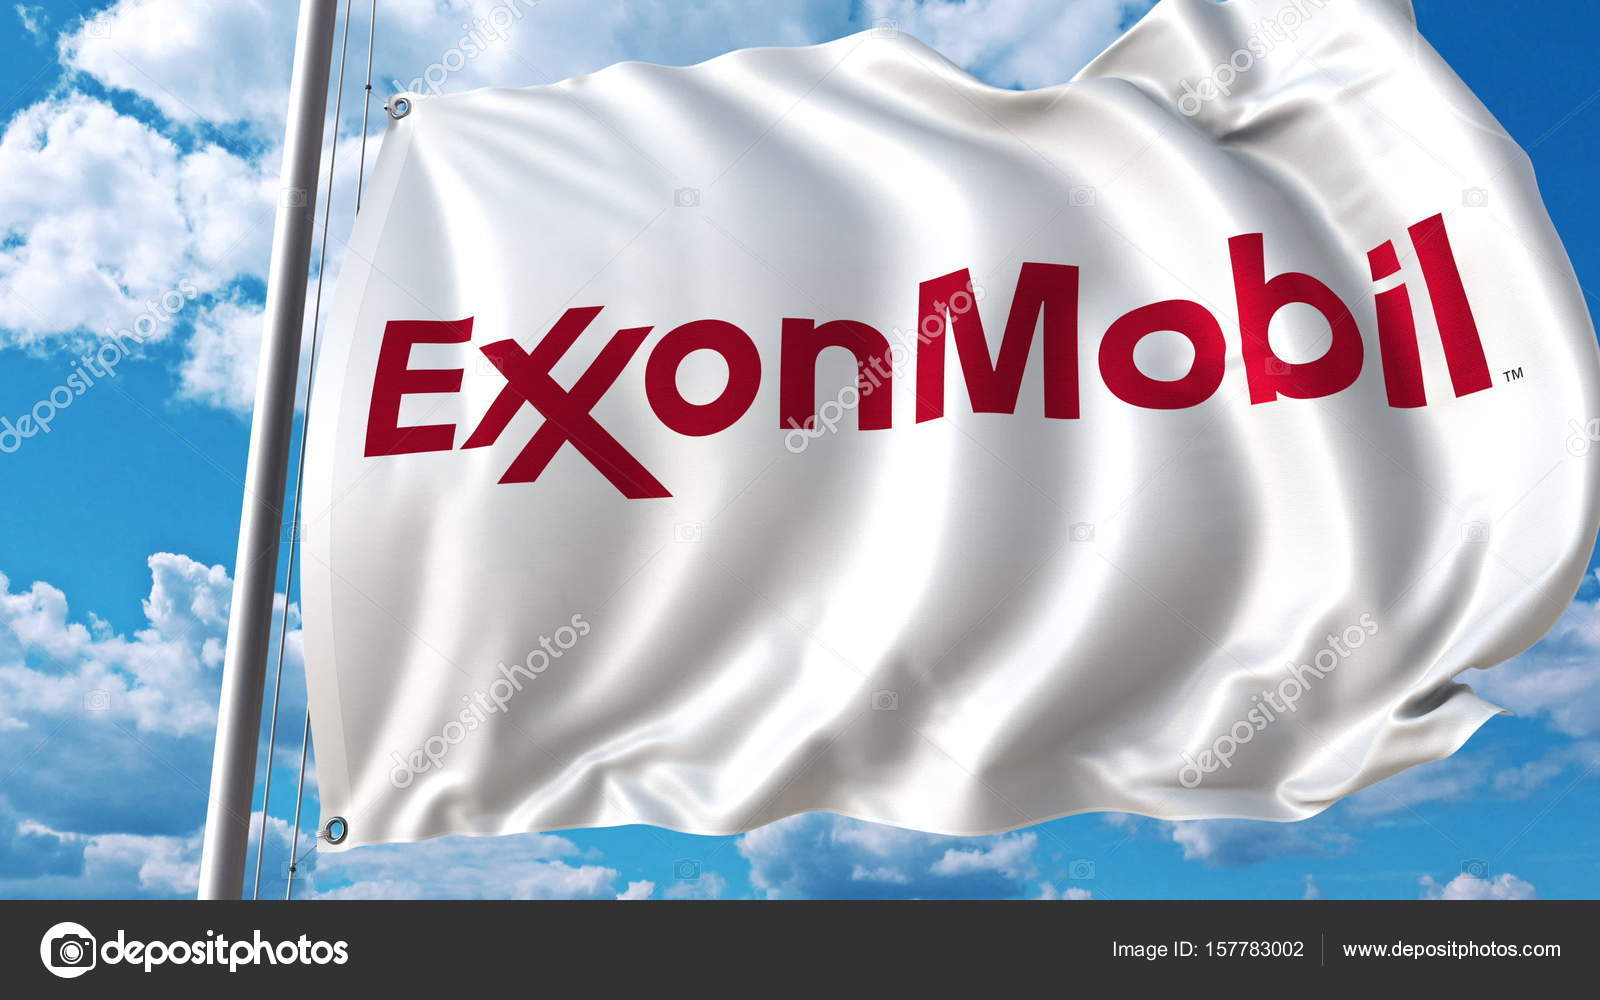

In [57]:
Image('/Users/praga/Downloads/single_prediction/exxon_or_enron.jpg')

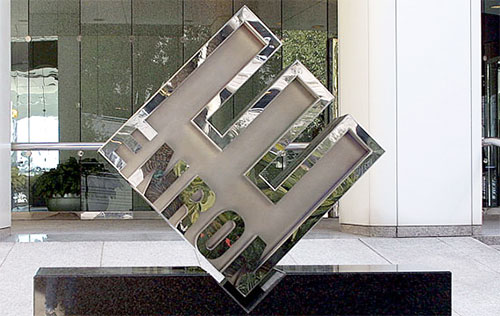

In [58]:
Image('/Users/praga/Downloads/single_prediction/exxon_or_enron_1.jpg')